In [133]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [68]:
loansData = pd.read_csv('loansData_clean.csv')

In [69]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [70]:
def greater_than_twelve(x):
    if x>=12:
        return 1
    else:
        return 0

In [71]:
loansData['IR_TF'] = loansData['Interest.Rate'].map(lambda x: greater_than_twelve(x))

In [72]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,IR_TF
0,20000,20000,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735,0
1,19200,19200,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715,1
2,35000,35000,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690,1
3,10000,9975,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695,0
4,12000,12000,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695,0


In [73]:
loansData[loansData['Interest.Rate'] >= 12]['IR_TF'].head(40)

1     1
2     1
5     1
7     1
8     1
10    1
11    1
12    1
15    1
16    1
20    1
21    1
22    1
24    1
26    1
27    1
30    1
31    1
32    1
33    1
34    1
39    1
40    1
42    1
43    1
44    1
47    1
49    1
51    1
52    1
53    1
54    1
56    1
58    1
62    1
63    1
66    1
67    1
68    1
69    1
Name: IR_TF, dtype: int64

In [74]:
loansData['intercept'] = float(1.0)

In [77]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,IR_TF,intercept
0,20000,20000,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735,0,1
1,19200,19200,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715,1,1
2,35000,35000,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690,1,1
3,10000,9975,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695,0,1
4,12000,12000,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695,0,1


In [78]:
loansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'FICO.Score', 'IR_TF', 'intercept'],
      dtype='object')

In [98]:
ind_var = [
       'Loan.Length', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months', 'FICO.Score', 'intercept']

In [99]:
# loansData = loansData.dropna() already done

In [100]:
logit = sm.Logit(loansData['IR_TF'], loansData[ind_var])

In [101]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.311600
         Iterations 8


In [102]:
coeff = result.params

In [103]:
print(coeff)

Loan.Length                        0.140720
Monthly.Income                     0.000043
Open.CREDIT.Lines                 -0.039542
Revolving.CREDIT.Balance           0.000004
Inquiries.in.the.Last.6.Months     0.359389
FICO.Score                        -0.087264
intercept                         56.261566
dtype: float64


In [109]:
logit2 = sm.Logit(loansData['IR_TF'], loansData[['FICO.Score', 'Amount.Requested', 'intercept']])

In [110]:
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.319276
         Iterations 8


In [113]:
result2.params

FICO.Score          -0.087480
Amount.Requested     0.000174
intercept           60.171952
dtype: float64

In [140]:
def logistic_function(coeff, fico, amount):
    fico_coeff = coeff['FICO.Score']
    amount_coeff = coeff['Amount.Requested']
    intercept = coeff['intercept']
    p = 1/(1 + math.exp((intercept + fico_coeff*(fico) - amount_coeff*(amount))))     
    return p

logistic_function(result2.params,720,10000)

0.9895484527437277

In [141]:
fico_ranges = list(range(460,935,5))
print(fico_ranges)

[460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930]


In [142]:
p_vals = []
for f in fico_ranges:
    p_vals.append(logistic_function(result2.params, f, 10000))


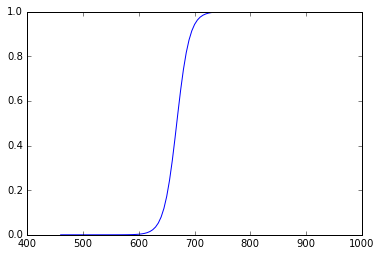

In [143]:
%matplotlib inline
plt.plot(fico_ranges, p_vals)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1106c4860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118b16ef0>]], dtype=object)

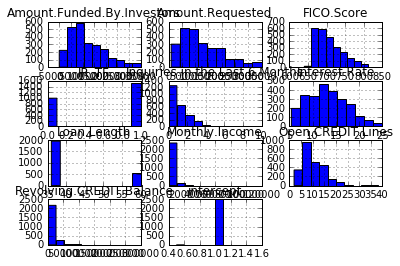

In [144]:
loansData.hist()